# Recurrent Neural Networks (RNN), LSTM, and GRU
In this notebook, we demonstrate the differences between:
- Vanilla RNN
- LSTM
- GRU
for sequence classification using a synthetic sine wave dataset.

In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

2025-05-23 18:38:03.954624: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Generate synthetic time series data
def generate_data(n_samples=1000, timesteps=50):
    X = []
    y = []
    for _ in range(n_samples):
        freq = np.random.uniform(0.1, 0.5)
        phase = np.random.uniform(0, 2 * np.pi)
        t = np.linspace(0, 1, timesteps)
        signal = np.sin(2 * np.pi * freq * t + phase)
        X.append(signal[:-1])
        y.append(1 if freq > 0.3 else 0)
    return np.array(X), np.array(y)

X, y = generate_data()
X = X.reshape((X.shape[0], X.shape[1], 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define and Train Models

In [3]:
# Function to build and train models
def build_and_train_rnn(model_type, X_train, y_train, X_test, y_test):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(32, input_shape=(X_train.shape[1], X_train.shape[2])))
    elif model_type == 'LSTM':
        model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])))
    elif model_type == 'GRU':
        model.add(GRU(32, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'{model_type} - Test Accuracy: {test_acc:.4f}')
    return history

In [4]:
# Train RNN, LSTM, and GRU
history_rnn = build_and_train_rnn('RNN', X_train, y_train, X_test, y_test)
history_lstm = build_and_train_rnn('LSTM', X_train, y_train, X_test, y_test)
history_gru = build_and_train_rnn('GRU', X_train, y_train, X_test, y_test)

/Users/jasonrobinson/my-data-science-journey-3/ds_journey_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


RNN - Test Accuracy: 0.4750
LSTM - Test Accuracy: 0.5050
GRU - Test Accuracy: 0.4650


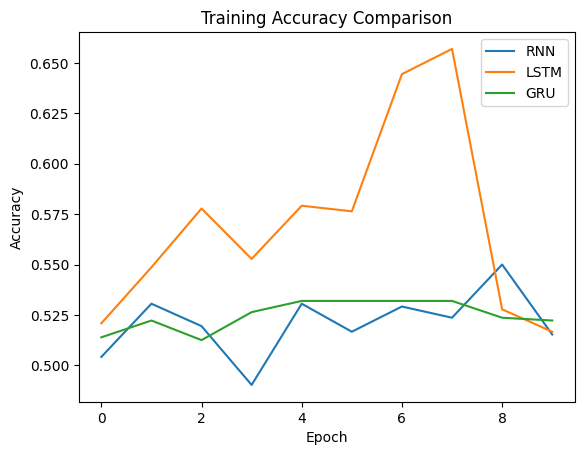

In [5]:
# Plot training accuracy
plt.plot(history_rnn.history['accuracy'], label='RNN')
plt.plot(history_lstm.history['accuracy'], label='LSTM')
plt.plot(history_gru.history['accuracy'], label='GRU')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()